In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from gplearn.genetic import SymbolicRegressor
from sklearn.metrics import mean_squared_error

In [2]:
def change(data):
    if data=="<31":
        return 31
    else :
        return int(data)

In [3]:
montrealBikeLane = pd.read_csv("datasets/MontrealBikeLane.csv")
weatherInfo = pd.read_csv("datasets/WeatherInfo.csv")

In [4]:
montrealBikeLane.rename(columns = {'Date':'date_time'}, inplace = True)
weatherInfo.rename(columns = {'Date/Time':'date_time'}, inplace = True)

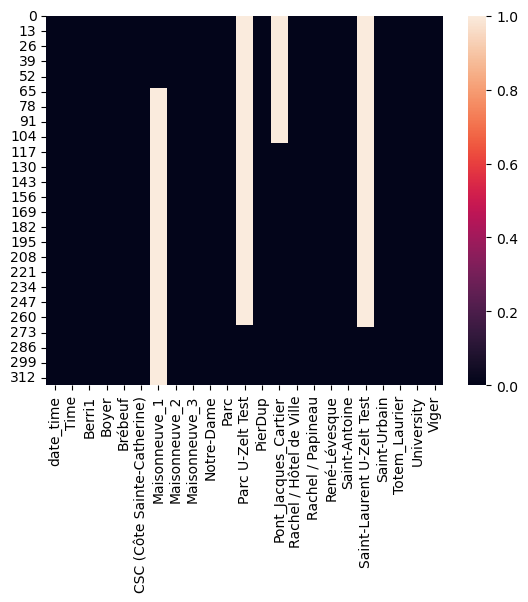

In [5]:
swarm_plot = sns.heatmap(montrealBikeLane.isnull())
fig = swarm_plot.get_figure()
fig.savefig("swarm_plot.png")

In [6]:
columns_to_remove = ['Maisonneuve_1','Parc U-Zelt Test', 'Pont_Jacques_Cartier', 'Saint-Laurent U-Zelt Test']
montrealBikeLane.drop(columns_to_remove, inplace=True, axis=1)

In [7]:
montrealBikeLane['date_time'] = pd.to_datetime(montrealBikeLane['date_time'], format='%d/%m/%Y').dt.strftime('%d-%m-%Y')
weatherInfo['date_time'] = pd.to_datetime(weatherInfo['date_time'], format='%Y/%m/%d').dt.strftime('%d-%m-%Y')

In [8]:
weatherInfo.groupby("Month")["Total Rain (mm)"]

In [9]:
weatherInfo['Total Rain (mm)'].fillna(weatherInfo.groupby("Month")["Total Rain (mm)"].transform("mean"), inplace=True)

In [10]:
weatherInfo['Total Snow (cm)'].fillna(weatherInfo.groupby("Month")["Total Snow (cm)"].transform("mean"), inplace=True)

In [11]:
weatherInfo['Total Rain (mm)']

0       0.0
1       0.0
2       0.0
3      26.8
4       0.0
       ... 
360     4.2
361     0.0
362     0.0
363     0.2
364     0.0
Name: Total Rain (mm), Length: 365, dtype: float64

In [12]:
montrealBikeLane.fillna(0, inplace=True)
output1 = pd.merge(montrealBikeLane, weatherInfo, on='date_time', how='inner')

In [13]:
columns_to_remove1 = ['Max Temp Flag','date_time', 'Min Temp Flag', 'Mean Temp Flag', 'Heat Deg Days Flag','Cool Deg Days Flag','Total Rain Flag','Snow on Grnd Flag','Time', 'Data Quality', 'Dir of Max Gust Flag', 'Spd of Max Gust Flag', 'Year', 'Day','Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Snow Flag','Total Precip Flag','Max Temp (°C)', 'Min Temp (°C)','Dir of Max Gust (10s deg)']
output1.drop(columns_to_remove1, inplace=True, axis=1)

In [14]:
output1['Snow on Grnd (cm)'].fillna(0, inplace=True)
output1['Total Precip (mm)'].fillna(0, inplace=True)
output1['Spd of Max Gust (km/h)'].fillna(31, inplace=True)

In [15]:
output1["Spd of Max Gust (km/h)"]=output1["Spd of Max Gust (km/h)"].apply(change)

In [16]:
output1.to_csv('filled_dataset.csv', index=False)

In [17]:
val=[]
for i in range(len(output1)):
    val.append(output1.iloc[i,2:23].values.sum())

In [18]:
output1["Total"]=val
print(output1["Total"])

0        427.3
1        685.2
2        680.9
3        197.6
4        297.4
        ...   
314    26971.8
315    15797.3
316    15821.8
317     8827.0
318     8995.0
Name: Total, Length: 319, dtype: float64


In [19]:
X=output1.drop("Total",axis=1)
y=output1["Total"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [21]:
est_gp = SymbolicRegressor(population_size=100, generations=20, tournament_size=20, random_state=42)
est_gp.fit(X_train, y_train)

SymbolicRegressor(population_size=100, random_state=42)

In [22]:
est_gp.score(X_test,y_test)

0.9291208110663253

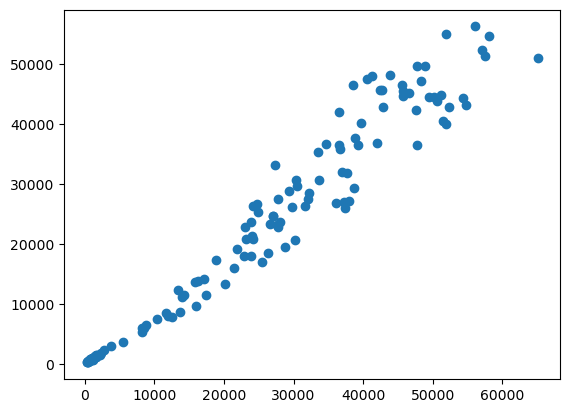

In [23]:
pred=est_gp.predict(X_test)
plt.scatter(y_test,pred)
plt.savefig('final_prediction.png')

In [24]:
y_pred_train = est_gp.predict(X_train)
y_pred_test = est_gp.predict(X_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

In [25]:
print("Train MSE:", mse_train)
print("Test MSE:", mse_test)
print("Best equation:", est_gp._program)

Train MSE: 14687665.949374808
Test MSE: 23144482.19833403
Best equation: add(sub(div(mul(add(X22, X10), sub(-0.670, X11)), sub(div(sub(sub(div(X15, X17), div(sub(sub(sub(div(sub(sub(div(sub(-0.670, X11), add(X23, X16)), div(X15, X17)), X11), add(X23, X16)), div(X15, X17)), add(X4, X0)), div(X15, X17)), X17)), add(div(mul(add(X22, X10), sub(-0.670, X11)), sub(div(sub(sub(div(sub(-0.670, X11), add(X23, X16)), div(X15, X17)), sub(div(sub(sub(div(sub(-0.670, X11), add(X23, X16)), div(X15, div(sub(div(add(X22, X10), add(X23, X16)), add(X4, X0)), add(X23, X16)))), add(X4, X0)), add(X23, X16)), div(X15, X17))), add(X23, X16)), div(X15, X17))), X0)), add(X23, X16)), div(X15, X17))), sub(sub(div(sub(sub(div(sub(sub(div(X15, X17), div(X15, X17)), add(div(mul(add(X22, X10), sub(-0.670, X11)), sub(div(sub(sub(div(sub(-0.670, X11), add(X23, X16)), div(X15, X17)), sub(div(sub(sub(div(sub(-0.670, X11), add(X23, X16)), div(X15, div(sub(div(add(X22, X10), add(X23, X16)), add(X4, X0)), add(X23, X16)))),